# Question 1


The number of multiplications required for matrix multiplication of (n, k) and (k, m) matrices is n * m * k, and the number of additions is n * m * (k-1).

Explanation-

Matrix multiplication involves multiplying each element of a row from the first matrix by the corresponding element of a column from the second matrix and then summing up these products to obtain the elements of the resulting matrix. If you have a matrix A of size (n, k) and a matrix B of size (k, m), the resulting matrix C will be of size (n, m).

To calculate a single element (i, j) of the resulting matrix C, you need to perform k multiplications and k-1 additions. Each multiplication involves multiplying the corresponding elements from the ith row of matrix A and the jth column of matrix B. The final element in the resulting matrix C is obtained by summing up these k products.

So, for a single element (i, j) in the resulting matrix C:

Multiplications = k
Additions = k-1

Therefore, for the entire matrix C, you would perform a total of n * m * k multiplications and n * m * (k-1) additions as there are n*m elements in the resulting matrix.



# Question 2


In [53]:
import numpy as np
import time

start = time.time()

A = [[0,2],[2,3]]
B = [[4,5],[6,7]]
n = len(A)
k = len(A[0])
m = len(B[0])

start = time.time()
C = [[0 for _ in range(m)] for _ in range(n)]
for i in range(n):
  for j in range(m):
    for h in range(k):
      C[i][j] += A[i][h] * B[h][j]
end = time.time()

print(C)
print('Time taken for matrix multiplication using list of lists is:',end-start)

[[12, 14], [26, 31]]
Time taken for matrix multiplication using list of lists is: 0.0003368854522705078


In [54]:
import numpy as np
import time


A = [[0,2],[2,3]]
B = [[4,5],[6,7]]
A = np.array(A)
B = np.array(B)

start = time.time()
result = np.dot(A,B)
end = time.time()

print(result)
print('Time taken for matrix multiplication using numpy is:',end-start)

[[12 14]
 [26 31]]
Time taken for matrix multiplication using numpy is: 0.00019240379333496094


NumPy is faster because it is implemented in C and optimized for numerical operations. The array operations in NumPy are highly efficient because the Numpy array is densely packed in memory due to its homogeneous type, it also frees the memory faster, and it takes advantage of low-level optimizations, making it faster than using Python lists for matrix operations.

# Question 3

If finding the highest element in a list requires one pass, the second highest requires two passes, and so on, the time complexity for finding the median using this method would be O($n^2$), where n is the length of the array. This is because you would need to perform around n/2 passes to find the median and each pass has time complexity O($n$).

A better method to find the median is to use a sorting algorithm with a time complexity of O($n log n$). Once the array is sorted, we can easily find the median using its index. For an array with an odd number of elements, the median is the middle element. For an array with an even number of elements, the median is the average of the two middle elements.

In [59]:
import numpy as np
import time

def linear(arr):
    n = len(arr)
    for i in range(n // 2):
        maximum = max(arr)
        arr.remove(maximum)

    if n % 2 == 1:
        return max(arr)
    else:
        return (max(arr) + maximum) / 2


def sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    return sorted_arr[n // 2] if n % 2 == 1 else (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

test = np.random.rand(10000).tolist()

# Compare performance
start_time = time.time()
result_linear = linear(test.copy())
end_time = time.time()

print(f"Linear approach result: {result_linear}")
print(f"Linear approach time: {end_time - start_time} seconds")

start_time = time.time()
result_sorting = sorting(test.copy())
end_time = time.time()

print(f"\nSorting approach result: {result_sorting}")
print(f"Sorting approach time: {end_time - start_time} seconds")

start_time = time.time()
result_numpy = np.median(test.copy())
end_time = time.time()

print(f"\nNumPy median result: {result_numpy}")
print(f"NumPy median time: {end_time - start_time} seconds")


Linear approach result: 0.5058291388074397
Linear approach time: 1.0586233139038086 seconds

Sorting approach result: 0.5058291388074397
Sorting approach time: 0.0019516944885253906 seconds

NumPy median result: 0.5058291388074397
NumPy median time: 0.003662586212158203 seconds


The sorting approach is faster for larger arrays due to its better time complexity. NumPy's median routine is also highly optimized and is expected to perform well too.

# Question 4


Gradient of the function found analytically:

$f(x,y) = x^2y+y^3 \sin{x}$

$\frac{\partial }{\partial x} f(x,y) = 2xy + y^3 \cos{x}$

$\frac{\partial }{\partial y} f(x,y) = x^2+ 3y^2 \sin{x}$

# Question 5


In [26]:
from jax import grad
import jax.numpy as jnp


def f(x,y):
  return x**2*y + y**3*jnp.sin(x)
def analy_gradx(x,y):
  return 2*x*y + y**3*np.cos(x)
def analy_grady(x,y):
  return x**2 + 3*y**2*np.sin(x)


x1 = 3.0
y1 = 4.0

x2=7.5
y2=8.67

df_dx = grad(f,argnums=0)
df_dy = grad(f,argnums=1)

print("Value of gradient wrt x using JAX (x=3, y=4)",round(float(df_dx(x1,y1)),3))
print("Value of gradient wrt y using JAX(x=3, y=4)",round(float(df_dy(x1,y1)),3))
print()
print("Value of gradient wrt x found analytically(x=3, y=4)",round(analy_gradx(x1,y1),3))
print("Value of gradient wrt y found analytically(x=3, y=4)",round(analy_grady(x1,y1),3))
print()
print("Value of gradient wrt x using JAX (x=7.5, y=8.67)",round(float(df_dx(x2,y2)),3))
print("Value of gradient wrt y using JAX(x=7.5, y=8.67)",round(float(df_dy(x2,y2)),3))
print()
print("Value of gradient wrt x found analytically(x=7.5, y=8.67)",round(analy_gradx(x2,y2),3))
print("Value of gradient wrt y found analytically(x=7.5, y=8.67)",round(analy_grady(x2,y2),3))
print()
print("We see that the values obtained by analytical solution and JAX are the same")


Value of gradient wrt x using JAX (x=3, y=4) -39.36
Value of gradient wrt y using JAX(x=3, y=4) 15.774

Value of gradient wrt x found analytically(x=3, y=4) -39.36
Value of gradient wrt y found analytically(x=3, y=4) 15.774

Value of gradient wrt x using JAX (x=7.5, y=8.67) 355.957
Value of gradient wrt y using JAX(x=7.5, y=8.67) 267.775

Value of gradient wrt x found analytically(x=7.5, y=8.67) 355.957
Value of gradient wrt y found analytically(x=7.5, y=8.67) 267.775

We see that the values obtained by analytical solution and JAX are the same


# Question 6


In [27]:
import sympy as sym

x , y = sym.symbols('x y')
f = x**2*y + y**3*sym.sin(x)

df_dx = f.diff(x)
df_dy = f.diff(y)

print("Gradient wrt x:",df_dx)
print("Gradient wrt y:",df_dy)

print()
print("We can see that the gradient found analytically is the same as the gradient found using JAX")



Gradient wrt x: 2*x*y + y**3*cos(x)
Gradient wrt y: x**2 + 3*y**2*sin(x)

We can see that the gradient found analytically is the same as the gradient found using JAX


# Question 7


In [ ]:
student_records = {
    2022: {'Branch 1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}},],
        'Branch 2': [],},
    2023: {'Branch 1': [],'Branch 2': [],},
    2024: {'Branch 1': [],'Branch 2': [],},
    2025: {'Branch 1': [],'Branch 2': [],},}
# we can add more data wherever we want

# Question 8


In [29]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

student_records= []

#year 2022
student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
student2 = Student(2, 'M', {'Maths': 90, 'English': 80})

branch1 = Branch('Branch 1')
branch1.students.append(student1)
branch1.students.append(student2)

branch2 = Branch('Branch 2')

year2022 = Year(2022)
year2022.branches.append(branch1)
year2022.branches.append(branch2)

#year 2023
branch3 = Branch('Branch 1')
branch4 = Branch('Branch 2')

year2023 = Year(2023)
year2023.branches.append(branch3)
year2023.branches.append(branch4)

#year 2024
branch5 = Branch('Branch 1')
branch6 = Branch('Branch 2')

year2024 = Year(2024)
year2024.branches.append(branch5)
year2024.branches.append(branch6)

#year 2025
branch7 = Branch('Branch 1')
branch8 = Branch('Branch 2')

year2025 = Year(2025)
year2025.branches.append(branch7)
year2025.branches.append(branch8)


student_records.append(year2022)
student_records.append(year2023)
student_records.append(year2024)
student_records.append(year2025)



# Question 9


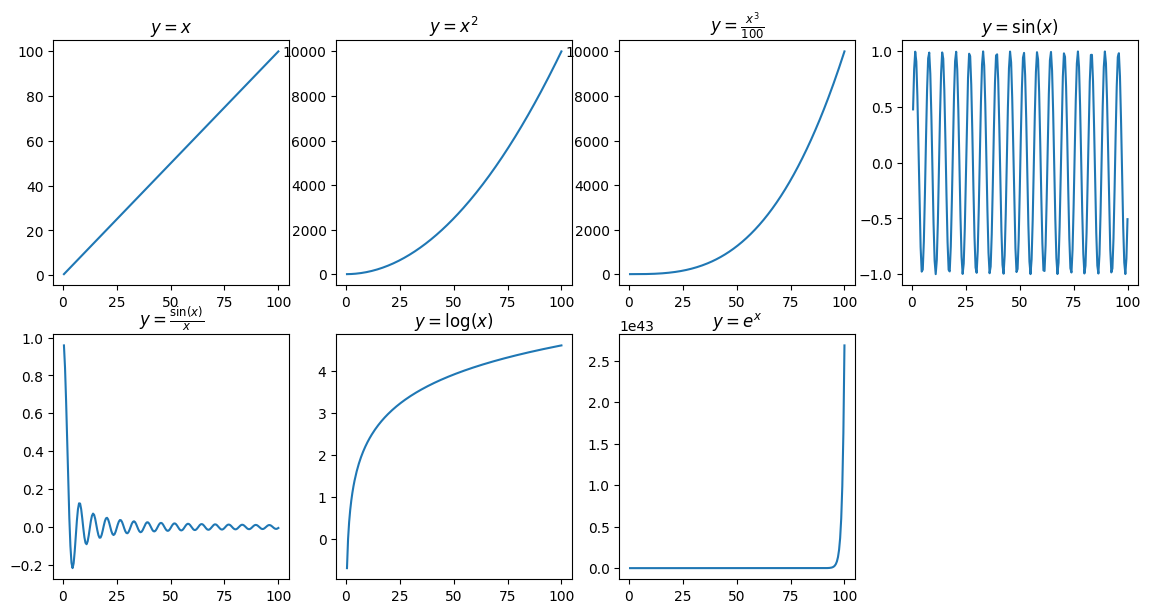

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 201, 1, dtype=int) * 0.5

plt.figure(figsize=(14, 7))

plt.subplot(2, 4, 1)
plt.plot(x, x)
plt.title('$y=x$')

plt.subplot(2, 4, 2)
plt.plot(x, x**2)
plt.title('$y=x^2$')

plt.subplot(2, 4, 3)
plt.plot(x, x**3 / 100)
plt.title('$y=\\frac{x^3}{100}$')

plt.subplot(2, 4, 4)
plt.plot(x, np.sin(x))
plt.title('$y=\\sin(x)$')

plt.subplot(2, 4, 5)
plt.plot(x, np.sin(x) / x)
plt.title('$y=\\frac{\\sin(x)}{x}$')

plt.subplot(2, 4, 6)
plt.plot(x, np.log(x))
plt.title('$y=\\log(x)$')

plt.subplot(2, 4, 7)
plt.plot(x, np.exp(x))
plt.title('$y=e^x$')

plt.show()


# Question 10


In [37]:
from numpy import random
import pandas as pd

x = random.uniform(low=1.0, high=2.0, size=(20,5))
df = pd.DataFrame(x,columns=['a','b','c','d','e'])

In [38]:
df


,a,b,c,d,e
0,1.714631,1.567486,1.630204,1.305754,1.068687
1,1.954182,1.090282,1.886374,1.707012,1.159891
2,1.903116,1.399164,1.978582,1.247634,1.722831
3,1.215790,1.888553,1.779651,1.672270,1.830840
4,1.078904,1.090698,1.068677,1.188072,1.400139
5,1.026614,1.853275,1.877278,1.404347,1.580686
6,1.852809,1.218404,1.077973,1.198934,1.956010
7,1.067654,1.005160,1.112393,1.750124,1.107701
8,1.284792,1.732238,1.112735,1.417781,1.782314
9,1.373906,1.869687,1.524783,1.995121,1.898522


In [39]:
print('column with highest standard deviation is', df.columns[np.argmax(df.std())])
print()
print('row with the lowest mean is', np.argmin(df.mean(axis=1)))

column with highest standard deviation is c

row with the lowest mean is 4


# Question 11

In [40]:
import numpy as np
import pandas as pd

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
lt8_rows_count = df[df['g'] == 'LT8'].shape[0]
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("DataFrame:")
print(df)
print("\nNumber of rows where the value in column 'g' is 'LT8':", lt8_rows_count)
print("Standard deviation of column 'f' for 'LT8' rows:", std_lt8)
print("Standard deviation of column 'f' for 'GT8' rows:", std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.714631  1.567486  1.630204  1.305754  1.068687  7.286763  LT8
1   1.954182  1.090282  1.886374  1.707012  1.159891  7.797741  LT8
2   1.903116  1.399164  1.978582  1.247634  1.722831  8.251328  GT8
3   1.215790  1.888553  1.779651  1.672270  1.830840  8.387103  GT8
4   1.078904  1.090698  1.068677  1.188072  1.400139  5.826490  LT8
5   1.026614  1.853275  1.877278  1.404347  1.580686  7.742200  LT8
6   1.852809  1.218404  1.077973  1.198934  1.956010  7.304130  LT8
7   1.067654  1.005160  1.112393  1.750124  1.107701  6.043032  LT8
8   1.284792  1.732238  1.112735  1.417781  1.782314  7.329858  LT8
9   1.373906  1.869687  1.524783  1.995121  1.898522  8.662021  GT8
10  1.860349  1.602870  1.466487  1.563429  1.770975  8.264110  GT8
11  1.732556  1.094241  1.038538  1.078280  1.757145  6.700760  LT8
12  1.154628  1.025605  1.926519  1.012595  1.835973  6.955319  LT8
13  1.532571  1.271922  1.441777  1.2

# Question 12


The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [41]:
import numpy as np

matrix = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

row = np.array([0,1,2])

result = matrix + row

print("Original Matrix:")
print(matrix)
print("\nRow Vector:")
print(row)
print("\nResult after Broadcasting:")
print(result)


Original Matrix:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Row Vector:
[0 1 2]

Result after Broadcasting:
[[1 2 3]
 [1 2 3]
 [1 2 3]]


In this example, the row is broadcasted over each row of the matrix, and the addition is performed element-wise. The result is a new matrix where each element is the sum of the corresponding elements from the original matrix and the row vector.

# Question 13


In [52]:
import numpy as np

arr = np.random.rand(100)

print("The index of the minimum element using np.argmin is", np.argmin(arr))

def argmin(array):
  min_index = 0
  for i in range(len(arr)):
    if arr[i] < arr[min_index]:
      min_index = i
  return min_index

print("The index of the minimum element using custom argmin is", argmin(arr))

The index of the minimum element using np.argmin is 92
The index of the minimum element using custom argmin is 92
